# 🌍 Análise Histórica dos Gastos com Turismo na Europa (1996–2011)


Este projeto analisa os padrões de gastos com turismo em países da União Europeia entre 1996 e 2011. A partir de dados do Eurostat, exploramos como o comportamento dos viajantes varia ao longo do tempo, entre destinos domésticos e internacionais, e por tipo de hospedagem. A análise é voltada para entender sazonalidade, impacto econômico e disparidades regionais no setor de turismo europeu.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
df_raw = pd.read_csv('/estat_tour_dem_exq4.tsv', sep='\t')
df_raw.head()

,"freq,duration,purpose,c_dest,accommod,unit,geo\TIME_PERIOD",1996-Q1,1996-Q2,1996-Q3,1996-Q4,1997-Q1,1997-Q2,1997-Q3,1997-Q4,1998-Q1,...,2009-Q3,2009-Q4,2010-Q1,2010-Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,2011-Q4
0,"Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,CH",:,:,:,:,:,:,:,:,:,...,: u,: u,: u,: u,: u,: u,: u,: u,: u,: u
1,"Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,CY",:,:,:,:,:,:,:,:,:,...,:,:,127,959,19580,:,:,:,:,:
2,"Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,CZ",:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,"Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,DE",:,:,:,:,744295,1378849,1901133,1149162,910604,...,4606000,2971000,2187000,3410000,4779000,2858000,1959000,3327000,5317000,3375000
4,"Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,EL",26017,80096,272988,36635,24492,53138,202067,38561,18456,...,741825,102001,64135,114370,505004,54158,48965,93307,:,:


In [13]:
# Separa a primeira coluna em múltiplas colunas
df_raw[['freq', 'duration', 'purpose', 'c_dest', 'accommod', 'unit', 'geo']] = df_raw[df_raw.columns[0]].str.split(',', expand=True)

# Remove a primeira coluna antiga
df_raw.drop(columns=df_raw.columns[0], inplace=True)

# Reorganiza as colunas (meta + período)
columns_ordered = ['geo', 'freq', 'duration', 'purpose', 'c_dest', 'accommod', 'unit'] + list(df_raw.columns[:-7])
df_raw = df_raw[columns_ordered]


In [15]:
# Remove espaços e converte para número, ignorando erros
df_melted['expenditure'] = (
    df_melted['expenditure']
    .str.replace(' ', '', regex=False)  # Remove espaços
    .str.replace('e', '', regex=False)  # Remove 'e' caso existam entradas como '62086e'
)

# Tenta converter para float, forçando erros como NaN
df_melted['expenditure'] = pd.to_numeric(df_melted['expenditure'], errors='coerce')

# Remove linhas com falha na conversão
df_melted = df_melted.dropna(subset=['expenditure'])

# Exibe o resultado
df_melted.head()



,geo,freq,duration,purpose,c_dest,accommod,unit,period,expenditure
4,EL,Q,N_GE1,PER,DOM,COL_HOT,THS_EUR,1996-Q1,26017.0
25,EL,Q,N_GE1,PER,DOM,COL_HOT,THS_NAC,1996-Q1,23725.0
46,EL,Q,N_GE1,PER,DOM,COL_OTH,THS_EUR,1996-Q1,26017.0
67,EL,Q,N_GE1,PER,DOM,COL_OTH,THS_NAC,1996-Q1,23725.0
87,EL,Q,N_GE1,PER,DOM,COL_OTH_CAMP,THS_EUR,1996-Q1,2277.0


<ipython-input-16-3317489528>:19: UserWarning: Glyph 129523 (\N{LUGGAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129523 (\N{LUGGAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


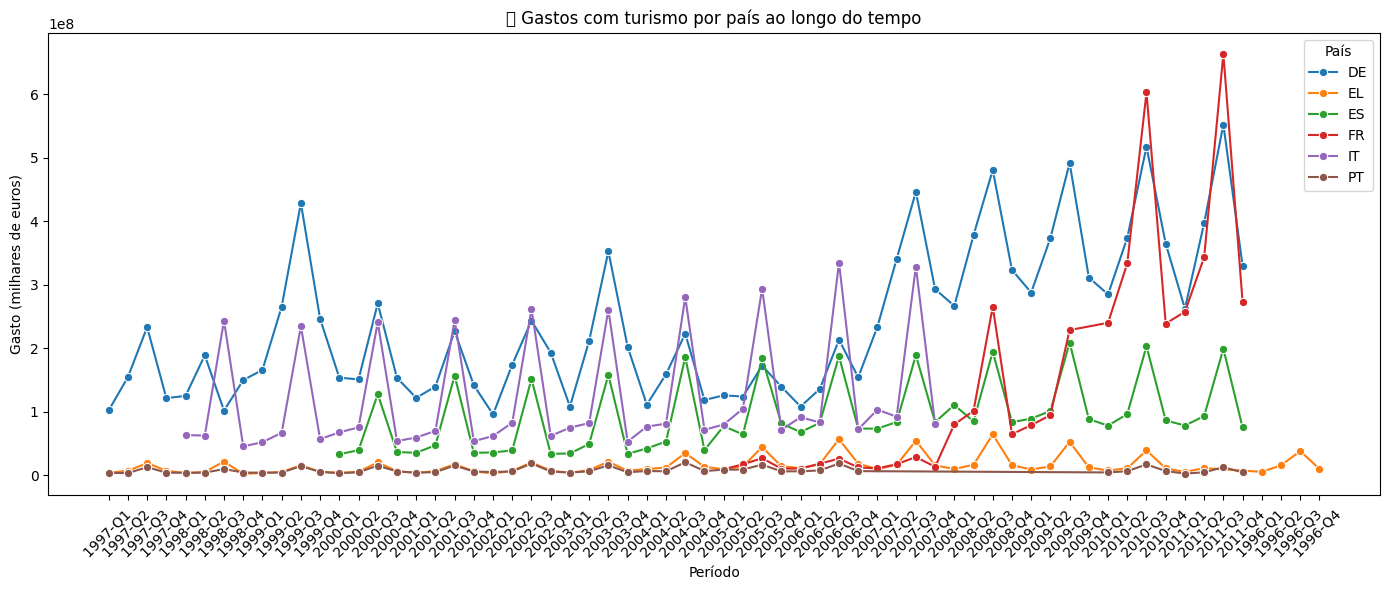

In [16]:
# Gastos agregados por país e período
df_country_trend = df_melted.groupby(['geo', 'period'])['expenditure'].sum().reset_index()

# Filtra alguns países pra facilitar a visualização
paises_destaque = ['FR', 'DE', 'IT', 'ES', 'EL', 'PT']
df_plot = df_country_trend[df_country_trend['geo'].isin(paises_destaque)]

# Gráfico de linha
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot, x='period', y='expenditure', hue='geo', marker='o')
plt.xticks(rotation=45)
plt.title('🧳 Gastos com turismo por país ao longo do tempo')
plt.xlabel('Período')
plt.ylabel('Gasto (milhares de euros)')
plt.legend(title='País')
plt.tight_layout()
plt.show()


**Variação dos Gastos Totais em Turismo por País (1996–2011)**

A análise da série temporal dos gastos com turismo revela padrões marcantes entre os principais países europeus:

Alemanha: Apresenta forte sazonalidade entre os trimestres Q1 e Q3, com aumentos significativos nos meses de verão. De 1997 a 2007, os gastos variaram entre 2 e 3 mil euros (milhares de euros), com quedas recorrentes em Q4 e Q1. Entre 2007 e 2011, os valores subiram, oscilando entre 3 e 4 mil, e ainda mantendo o padrão de queda no fim do ano. A Alemanha encerra o período como líder em gastos turísticos.

Itália: Com dados até 2007, também exibe picos sazonais entre Q1 e Q3, com variações de 1,5 a 2,5 mil euros. O padrão é semelhante ao da Alemanha, mas em uma faixa de valores mais baixa.

Espanha: Entre 1999 e 2011, segue o mesmo comportamento sazonal observado na Itália, mas com um volume menor de gastos: entre 0,5 e 1,5 mil euros nos períodos de alta.

França: Até 2007, manteve-se com gastos estáveis, girando em torno de 0,5 mil euros. A partir de 2007, observamos uma tendência de crescimento, fazendo com que o país encoste nos líderes no fim do período, encerrando em segunda posição.

Portugal: Apresentou uma linha de gastos baixa e estável, geralmente abaixo de 0,5 mil euros, sem grandes variações durante todo o período analisado.

Grécia (EL): Comportamento semelhante ao de Portugal na maior parte do tempo, mas com picos isolados entre 2005 e 2009, provavelmente influenciados por eventos turísticos ou econômicos pontuais.

A sazonalidade é uma característica marcante do turismo europeu. Verões (Q2 e Q3) concentram os maiores gastos, enquanto os meses frios (Q4 e Q1) revelam quedas sistemáticas. Além disso, o crescimento da França e o domínio da Alemanha apontam para economias mais resilientes e com forte infraestrutura turística.

<ipython-input-28-3850739017>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dest, x='destino', y='expenditure', palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


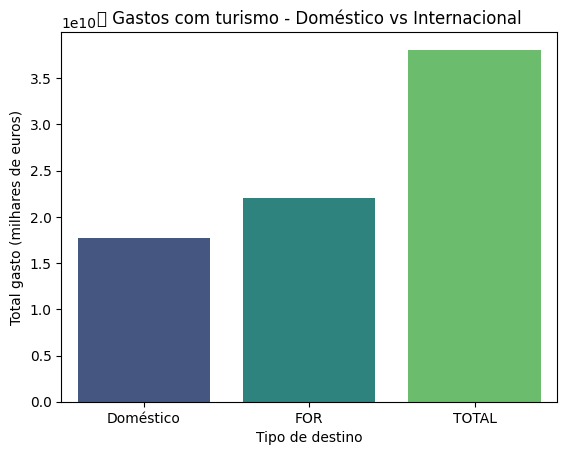

In [28]:
# Cria coluna com tipo de destino: DOM (doméstico) vs ABR (abroad)
df_melted['destino'] = df_melted['c_dest'].replace({'DOM': 'Doméstico', 'ABR': 'Internacional'})

# Gastos totais por tipo de destino
df_dest = df_melted.groupby('destino')['expenditure'].sum().reset_index()

# Gráfico de barras
sns.barplot(data=df_dest, x='destino', y='expenditure', palette='viridis')
plt.title('🌍 Gastos com turismo - Doméstico vs Internacional')
plt.ylabel('Total gasto (milhares de euros)')
plt.xlabel('Tipo de destino')
plt.show()


**Análise dos Gastos Nacionais vs. Internacionais**

Os gastos domésticos (viagens dentro do próprio país) ficam na faixa entre 1.5 e 2.0 (milhares de euros). Isso indica que o turismo interno representa uma parcela importante, mas relativamente menor dos gastos totais.

Os gastos em destinos internacionais (viagens para fora do país) estão entre 2.0 e 2.5(milhares de euros), ou seja, são consistentemente maiores que os gastos domésticos. Isso sugere que os turistas europeus tendem a gastar mais quando viajam para outros países, possivelmente por viagens mais longas ou mais estruturadas.

O total de gastos, que soma doméstico e internacional, fica acima de 3.5, refletindo a soma das duas categorias e mostrando a importância econômica geral do turismo.

**Conclusão**:
Os turistas europeus gastam mais em viagens internacionais do que nas domésticas, o que pode indicar que viagens para fora do país são mais frequentes ou mais caras (hospedagem, transporte, alimentação). O turismo doméstico ainda tem peso significativo, mas menor, possivelmente associado a viagens mais curtas ou mais econômicas.

<ipython-input-27-1352933557>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_accom, y='accommod_label', x='expenditure', palette='magma')
<ipython-input-27-1352933557>:24: UserWarning: Glyph 127976 (\N{HOTEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127976 (\N{HOTEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


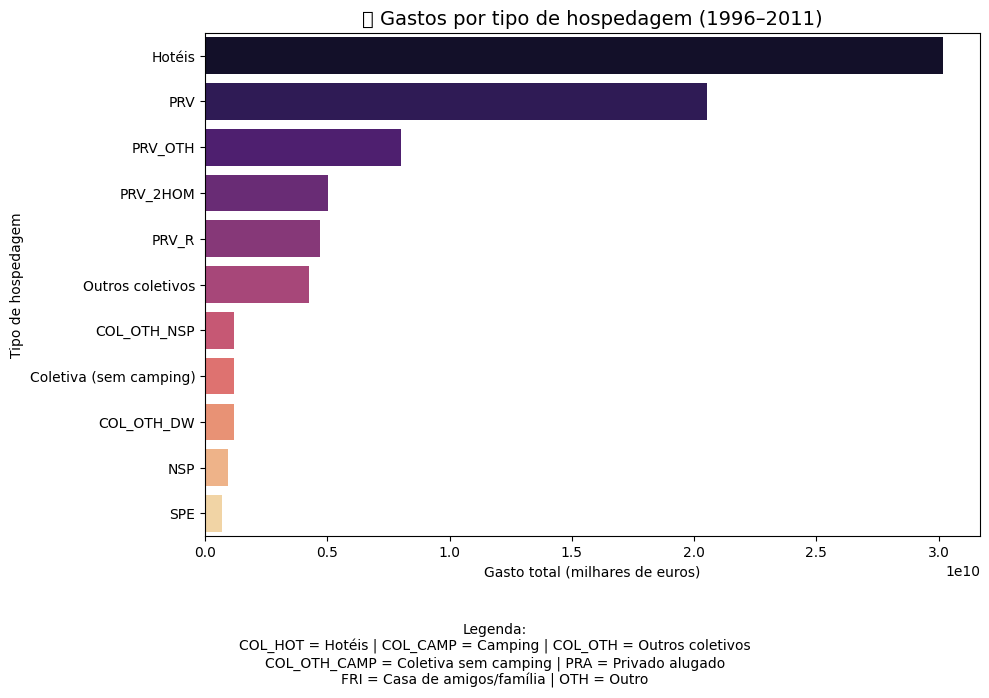

In [27]:
# Aplica o mapeamento, mantendo o código original se não estiver no dicionário
df_melted['accommod_label'] = df_melted['accommod'].apply(lambda x: accommod_map.get(x, x))

# Agrupa os dados com todos os tipos
df_accom = df_melted.groupby('accommod_label')['expenditure'].sum().reset_index()

# Ordena do maior para o menor
df_accom = df_accom.sort_values(by='expenditure', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_accom, y='accommod_label', x='expenditure', palette='magma')
plt.title('🏨 Gastos por tipo de hospedagem (1996–2011)', fontsize=14)
plt.xlabel('Gasto total (milhares de euros)')
plt.ylabel('Tipo de hospedagem')

# Adiciona caixa de texto explicativa dentro do gráfico
plt.gcf().text(0.5, -0.15,
    "Legenda:\nCOL_HOT = Hotéis | COL_CAMP = Camping | COL_OTH = Outros coletivos\n"
    "COL_OTH_CAMP = Coletiva sem camping | PRA = Privado alugado\n"
    "FRI = Casa de amigos/família | OTH = Outro",
    fontsize=10, ha='center')

plt.tight_layout()
plt.show()




### 📌 Principais insights

- Os hotéis concentram a maior parte dos gastos com hospedagem na Europa entre 1996 e 2011.
- O segundo maior grupo são os alojamentos coletivos (exceto camping).
- As categorias "Amigos/Família" e "Camping" têm gastos significativamente menores, mas podem indicar perfis de viajantes mais econômicos.


**Conclusão Final**

Este projeto explorou os gastos com turismo na Europa entre 1996 e 2011, utilizando dados oficiais do Eurostat. Através de uma análise exploratória, identificamos padrões importantes sobre comportamento dos viajantes, sazonalidade e disparidades regionais. Entre os principais insights:

Gastos domésticos (viagens dentro do próprio país) foram ligeiramente menores do que os internacionais, mas representam uma parcela significativa e estável ao longo do tempo.

Os gastos totais com turismo cresceram gradualmente até 2007, quando ocorreram oscilações mais intensas — possivelmente influenciadas pela crise econômica global de 2008.

Países como Alemanha e França lideram os gastos, com forte padrão sazonal, revelando o impacto do verão europeu no setor.

Na outra ponta, Portugal e Grécia mantêm níveis mais baixos e estáveis, indicando menor fluxo financeiro interno no turismo, apesar de serem destinos relevantes.

A variação nos tipos de hospedagem também revela o perfil dos viajantes: hotéis e alojamentos coletivos predominam nas escolhas, especialmente em destinos domésticos.

Este estudo evidencia a importância do turismo como indicador econômico e mostra como fatores externos e padrões culturais impactam o comportamento de viagem ao longo do tempo. A análise histórica pode servir como base para decisões estratégicas em políticas públicas, marketing e investimentos no setor.